<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Data description

## `crim`

per capita crime rate by town.

## `zn`

proportion of residential land zoned for lots over 25,000 sq.ft.

## `indus`

proportion of non-retail business acres per town.

## `chas`

Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

## `nox`

nitrogen oxides concentration (parts per 10 million).

## `rm`

average number of rooms per dwelling.

## `age`

proportion of owner-occupied units built prior to 1940.

## `dis`

weighted mean of distances to five Boston employment centres.

## `rad`

index of accessibility to radial highways.

## `tax`

full-value property-tax rate per $10,000.

## `ptratio`

pupil-teacher ratio by town.

## `black`

1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

## `lstat`

lower status of the population (percent).

## `medv`

median value of owner-occupied homes in $1000s.

# Linear Regression Manual

In [ ]:
# boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# 'feature_names': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston = datasets.load_boston(return_X_y=True)
boston

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
medv = boston['medv'].to_numpy().reshape(-1,1)

rm = boston['rm'].to_numpy().reshape(-1,1)
lstat = boston['lstat'].to_numpy().reshape(-1,1)
ptratio = boston['ptratio'].to_numpy().reshape(-1,1)

tax = boston['tax'].to_numpy().reshape(-1,1)
crim = boston['crim'].to_numpy().reshape(-1,1)
zn = boston['zn'].to_numpy().reshape(-1,1)
indus = boston['indus'].to_numpy().reshape(-1,1)
chas = boston['chas'].to_numpy().reshape(-1,1)
nox = boston['nox'].to_numpy().reshape(-1,1)
age = boston['age'].to_numpy().reshape(-1,1)
dis = boston['dis'].to_numpy().reshape(-1,1)
rad = boston['rad'].to_numpy().reshape(-1,1)
b = boston['b'].to_numpy().reshape(-1,1)

# Parameters
# rm, lstat, ptratio, tax, crim, zn, indus, chas, nox, age, dis, rad, b

# TRAIN_TEST_RATIO = 0.9
# train_number = round(X.shape[0] * TRAIN_TEST_RATIO)
# X_train = rm[:train_number]
# Y_train = medv[:train_number]

# X_test = rm[train_number:]
# Y_test = medv[train_number:]

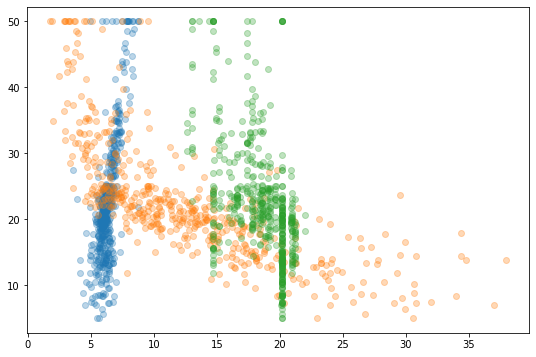

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(rm, medv,'o', alpha = 0.3)
plt.plot(lstat, medv, 'o', alpha = 0.3)
plt.plot(ptratio, medv, 'o', alpha = 0.3)

# plt.plot(tax, medv, 'o', alpha = 0.3)
# plt.plot(crim, medv, 'o', alpha = 0.3)
# plt.plot(zn, medv, 'o', alpha = 0.3)
# plt.plot(indus, medv, 'o', alpha = 0.3)
# plt.plot(chas, medv, 'o', alpha = 0.3)
# plt.plot(nox, medv, 'o', alpha = 0.3)
# plt.plot(age, medv, 'o', alpha = 0.3)
# plt.plot(dis, medv, 'o', alpha = 0.3)
# plt.plot(rad, medv, 'o', alpha = 0.3)
# plt.plot(b, medv, 'o', alpha = 0.3)

## Main w/ one input

In [ ]:
class LinearRegression:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        self.w = 0.
        self.b = 0.
    
    def mse(self, y_, y):
        return np.sum(np.square(y_ - y)) / y.shape[0]

    def predict(self, X):
        return self.w * X + self.b
    
    def w_corr(self, y_, y, X):
        return 2 / y.shape[0] * np.sum((y_ - y) * X)
        
    def b_corr(self, y_, y):
        return 2 / y.shape[0] * np.sum(y_ - y)

    def train(self, X, y):
        for i in range(self.gens):
            y_ = self.predict(X)
            
            self.w = self.w - self.lr * self.w_corr(y_, y, X)
            self.b = self.b - self.lr * self.b_corr(y_, y)
        
        print("\nIteration: {}/{}".format(i + 1, self.gens))
        print("W: {}\tB: {}".format(self.w,self.b))
        print("MSE: {}".format(self.mse(y_, y)))

## Initiation

In [ ]:
model = LinearRegression(10e-5, 1500000)    # Да, это жестко

## Training and Results


Iteration: 1500000/1500000
W: 8.95184633026364	B: -33.71478232151032
MSE: 43.61180840430113

Iteration: 1500000/1500000
W: -0.9500493537535698	B: 34.5538408793094
MSE: 38.48296722989415

Iteration: 1500000/1500000
W: -2.1313773061565557	B: 61.861991948725816
MSE: 62.655355735925305


<function matplotlib.pyplot.show>

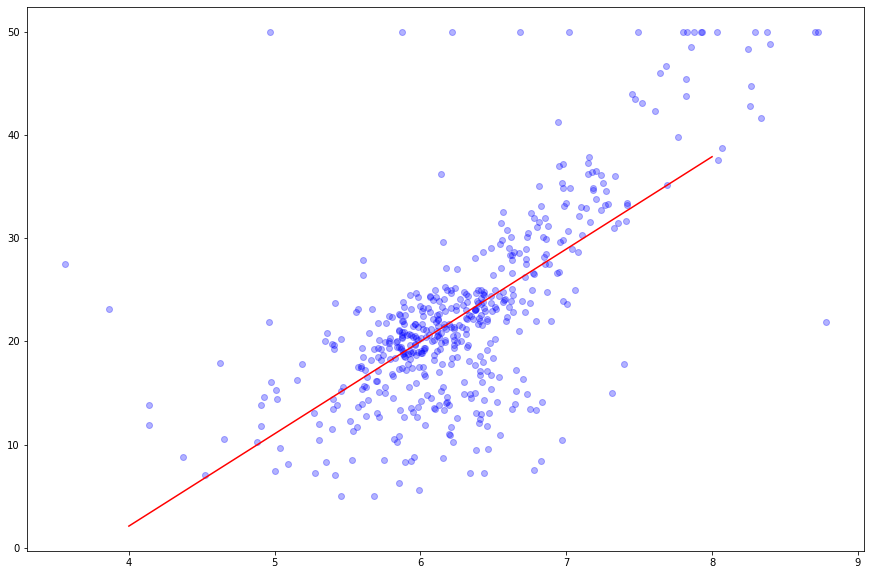

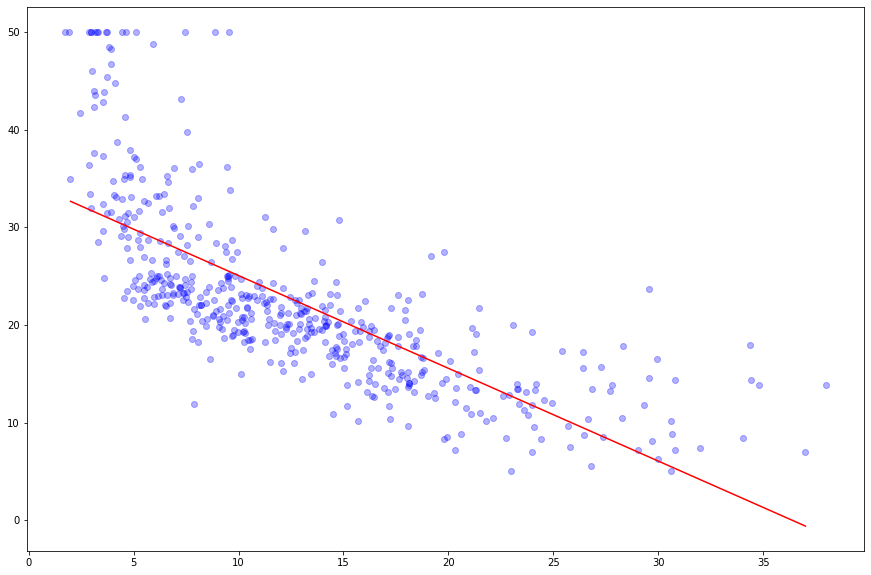

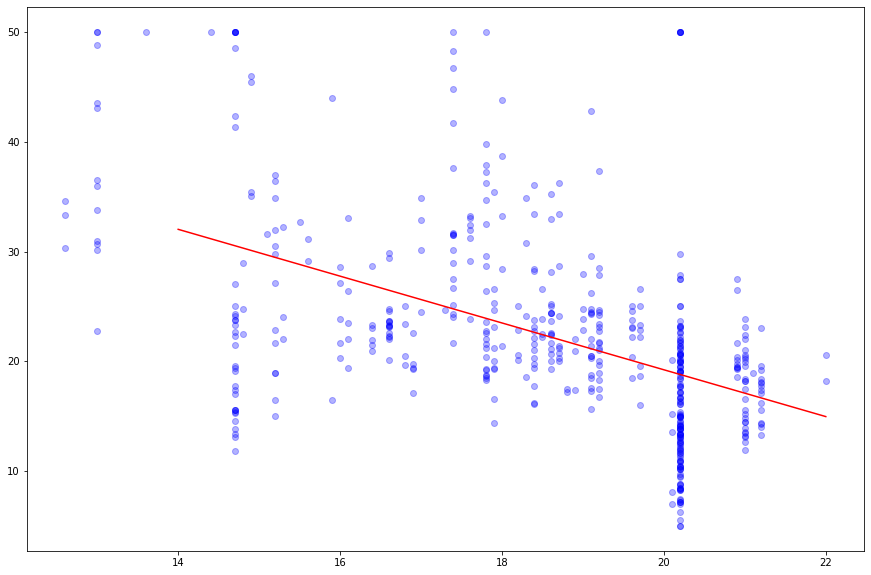

In [ ]:
model.train(rm, medv)
plt.figure(figsize=(15,10))
plt.plot(rm, medv,'bo', alpha = 0.3)
xx = np.arange(4, 9).reshape(-1, 1)
plt.plot(xx, model.predict(xx),'r')

model.train(lstat, medv)
plt.figure(figsize=(15,10))
plt.plot(lstat, medv,'bo', alpha = 0.3)
xx = np.arange(2, 38).reshape(-1, 1)
plt.plot(xx, model.predict(xx),'r')

model.train(ptratio, medv)
plt.figure(figsize=(15,10))
plt.plot(ptratio, medv,'bo', alpha = 0.3)
xx = np.arange(14, 23).reshape(-1, 1)
plt.plot(xx, model.predict(xx),'r')

plt.show

# Linear Regression SKLearn
w/ one input

Coefficients: 
 [[9.10210898]]
Coefficients: 
 [-34.67062078]


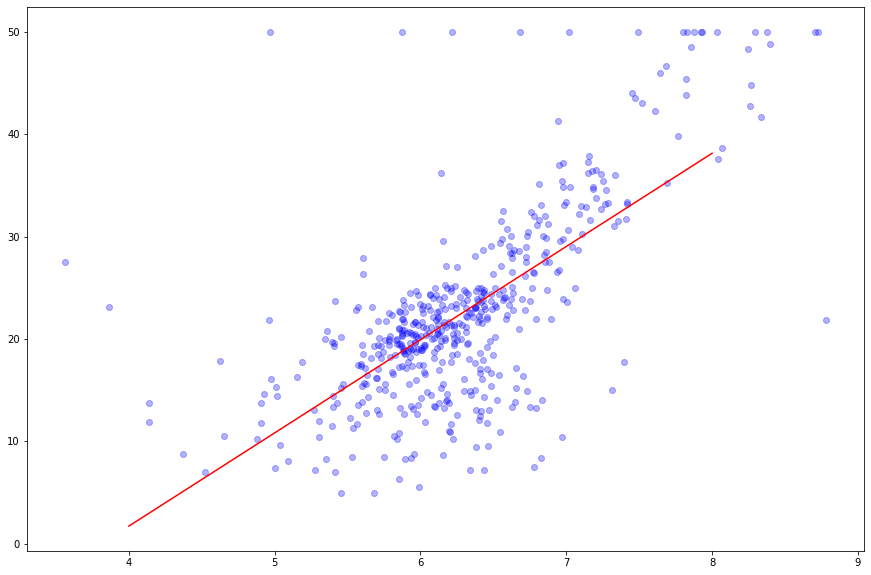

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(rm, medv)

# Make predictions using the testing set
xx = np.arange(4, 9).reshape(-1, 1)
y_ = regr.predict(xx)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Coefficients: \n', regr.intercept_)

# Plot outputs
plt.figure(figsize=(15,10))
plt.plot(rm, medv, 'bo', alpha = 0.3)
plt.plot(xx, y_, 'r')

plt.show()

# MultiInput

## ~~Not~~ working...??

In [ ]:
# inputs = np.asarray([rm, lstat, ptratio])
# inputs = np.concatenate((rm, lstat, ptratio), axis = 1)
# tax, crim, zn, indus, chas, nox, age, dis, rad, b

# Tough version
# 13 inputs
def turnFine_13(a, b, c, d, e, f, g, h, i, j, k, l, m):
    inputs = np.empty([a.shape[0],13,1])
    for ii in range(a.shape[0]):
        frame = np.concatenate((a[ii], b[ii], c[ii], d[ii], e[ii], f[ii], g[ii], h[ii], i[ii], j[ii], k[ii], l[ii], m[ii]), axis = 0).reshape(-1,1)
        inputs[ii] = frame
    return inputs

# Light version
# 3 inputs
def turnFine(a, b, c):
    inputs = np.empty([a.shape[0],3,1])
    for i in range(a.shape[0]):
        frame = np.concatenate((a[i], b[i], c[i]), axis = 0).reshape(-1,1)
        inputs[i] = frame
    return inputs

# for i in range(rm.shape[0]):
#     frame = np.concatenate((rm[i], lstat[i], ptratio[i]), axis = 0).reshape(-1,1)
#     inputs[i] = frame
# frame.shape, inputs.shape
# inputs

In [ ]:
np.zeros((1,3))[0][2]
# for i in range(506):
#     res = np.dot(np.array([2,2,2]), inputs[i])
# res.shape

0.0

In [ ]:
class LinearRegression_MultiInputs:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        # Change '13' or '3' for different approach
        self.w = np.zeros((1,3))
        self.b = 0.
    
    def mse(self, y_, y):
        return np.sum(np.square(y_ - y)) / y.shape[0]
    
    def w_corr(self, y_, y, X):
        return 2 / y.shape[0] * np.sum((y_ - y) * X)
        
    def b_corr(self, y_, y):
        return 2 / y.shape[0] * np.sum(y_ - y)

    def predict(self, X):
        return np.dot(self.w, X) + self.b

    # For 3 inputs
    def train(self, X, y):
        for i in range(self.gens):
            y_ = self.predict(X)

            # for j in range(X.shape[0]):
            for k in range(3):
            #         self.w[0][k] = self.w[0][k] - self.lr * self.w_corr(y_[0][j], y[j], X[j][k])
                self.w[0][k] -= self.lr * self.w_corr(y_[0][self.gens], y[self.gens], X[self.gens][k])
            # self.b = self.b - self.lr * self.b_corr(y_[0][j], y[j])
            self.b -= self.lr * self.b_corr(y_[0][self.gens], y[self.gens])
                    
        
        print("\nIteration: {}/{}".format(i + 1, self.gens))
        print("W: {}, {}, {}\tB: {}".format(self.w[0][0],self.w[0][1],self.w[0][2],self.b))
        print("MSE: {}".format(self.mse(y_, y)))

    # For 13 inputs 
    def train_13(self, X, y):
        for i in range(self.gens):
            y_ = self.predict(X)

            print("\nIteration: {}/{}".format(i + 1, self.gens))
            print("MSE: {}".format(self.mse(y_, y)))
            
            for j in range(X.shape[0]):
                for k in range(13):
                    # print(y_[0][j].shape, y[j].shape, X[j][k].shape)
                    self.w[0][k] -= - self.lr * self.w_corr(y_[0][j], y[j], X[j][k])
                    self.b -= - self.lr * self.b_corr(y_[0][j], y[j])
        
        print("\nIteration: {}/{}".format(i + 1, self.gens))
        print("W: {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}\tB: {}".format(self.w[0][0],self.w[0][1],self.w[0][2],self.w[0][3],self.w[0][4],self.w[0][5],self.w[0][6],self.w[0][7],self.w[0][8],self.w[0][9],self.w[0][10],self.w[0][11],self.w[0][12],self.b))
        print("MSE: {}".format(self.mse(y_, y)))

In [ ]:
model_m = LinearRegression_MultiInputs(10e-3, 500) # just you wait...

In [ ]:
# model_m.train(inputs, medv)
model_m.train(turnFine(rm, lstat, ptratio), medv)


Iteration: 500/500
W: nan, nan, nan	B: nan
MSE: nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


(1, 5, 1)


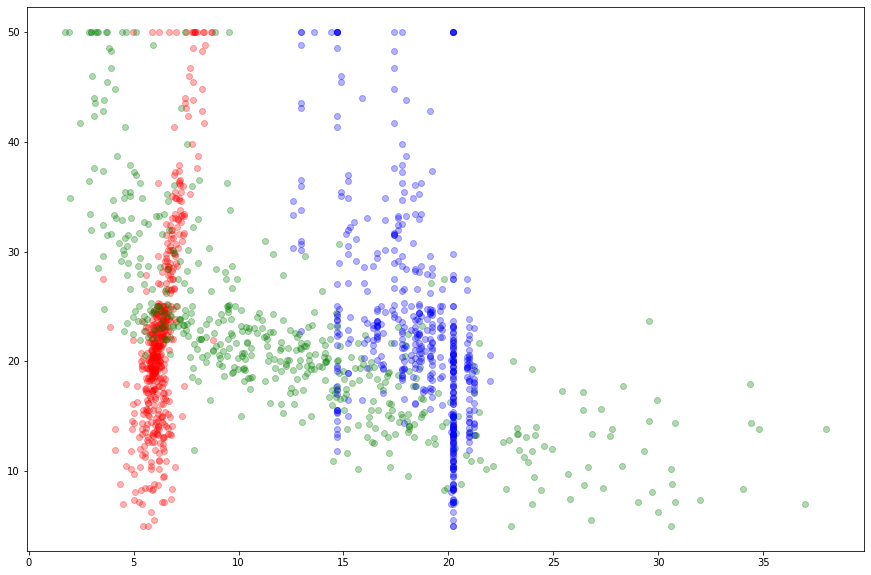

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(rm, medv,'ro', alpha = 0.3)
plt.plot(lstat, medv,'go', alpha = 0.3)
plt.plot(ptratio, medv,'bo', alpha = 0.3)

aa = np.arange(4, 9).reshape(-1, 1)
bb = np.arange(10, 15).reshape(-1, 1)
cc = np.arange(15, 20).reshape(-1, 1)
# aa, bb, cc
# print(turnFine(aa,bb,cc))
y_ = model_m.predict(turnFine(aa,bb,cc))
print(y_.shape)

# plt.plot(aa, y_[0], 'black', alpha = 0.75)
# plt.plot(bb, y_[0], 'black', alpha = 0.75)
# plt.plot(cc, y_[0], 'black', alpha = 0.75)
# Plot outputs
# plt.plot(aa, bb, cc, y_, 'b')

# plt.show

In [ ]:
model_m13 = LinearRegression_MultiInputs(10e-10, 5000)
model_m13.train_13(turnFine_13(rm, lstat, ptratio, tax, crim, zn, indus, chas, nox, age, dis, rad, b),medv)

Выходные данные были обрезаны до нескольких последних строк (5000).

Iteration: 3336/5000
MSE: 69.88154313966372

Iteration: 3337/5000
MSE: 69.87998096810446

Iteration: 3338/5000
MSE: 69.87841916265805

Iteration: 3339/5000
MSE: 69.87685772310101

Iteration: 3340/5000
MSE: 69.87529664921013

Iteration: 3341/5000
MSE: 69.87373594076233

Iteration: 3342/5000
MSE: 69.87217559753476

Iteration: 3343/5000
MSE: 69.87061561930471

Iteration: 3344/5000
MSE: 69.86905600584969

Iteration: 3345/5000
MSE: 69.86749675694735

Iteration: 3346/5000
MSE: 69.86593787237558

Iteration: 3347/5000
MSE: 69.86437935191242

Iteration: 3348/5000
MSE: 69.86282119533608

Iteration: 3349/5000
MSE: 69.86126340242498

Iteration: 3350/5000
MSE: 69.85970597295773

Iteration: 3351/5000
MSE: 69.85814890671305

Iteration: 3352/5000
MSE: 69.85659220346999

Iteration: 3353/5000
MSE: 69.85503586300759

Iteration: 3354/5000
MSE: 69.85347988510523

Iteration: 3355/5000
MSE: 69.8519242695424

Iteration: 3356/5000
MSE: 69.850

In [ ]:
params = ['rm', 'lstat', 'ptratio','tax', 'crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'b']
for i in range(13):
    print("W-{}: {} * 10e-3\n".format(params[i], model_m13.w[0][i]*1000))

W-rm: 37.91409794237644 * 10e-3

W-lstat: -105.09384605093715 * 10e-3

W-ptratio: 25.710233346711238 * 10e-3

W-tax: 0.9558407383831116 * 10e-3

W-crim: -37.69090003912459 * 10e-3

W-zn: 115.90332743057597 * 10e-3

W-indus: -23.317497146289558 * 10e-3

W-chas: 1.994969366763497 * 10e-3

W-nox: 1.099619934072998 * 10e-3

W-age: 39.24170664650588 * 10e-3

W-dis: 9.280766373016546 * 10e-3

W-rad: -0.6637786452669838 * 10e-3

W-b: 51.89417442584311 * 10e-3



## SKLearn

In [ ]:
X = boston[['rm','lstat','ptratio']]
Y = boston['medv']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# # with statsmodels
# X = sm.add_constant(X) # adding a constant
 
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
# print_model = model.summary()
# print(print_model)

Intercept: 
 18.567111505395236
Coefficients: 
 [ 4.51542094 -0.57180569 -0.93072256]


In [ ]:
X = boston[['rm','lstat','ptratio','tax','crim','zn','indus','chas','nox','age','dis','rad','b']]
Y = boston['medv']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_,'\n')
for i in range(13):
    print("W-{}: {}\n".format(params[i], regr.coef_[i]))
# print('Coefficients: \n', regr.coef_)

Intercept: 
 36.45948838509017 

W-rm: 3.809865206809197

W-lstat: -0.5247583778554907

W-ptratio: -0.9527472317072971

W-tax: -0.012334593916574543

W-crim: -0.1080113578367979

W-zn: 0.04642045836688119

W-indus: 0.020558626367073105

W-chas: 2.6867338193447785

W-nox: -17.766611228300125

W-age: 0.0006922246403445464

W-dis: -1.4755668456002577

W-rad: 0.3060494789851765

W-b: 0.009311683273793947

